<a href="https://colab.research.google.com/github/cfigueroa0115/Challenge_telecom_x_parte_2/blob/main/TELECOM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TELECOM # 2**

In [2]:
import pandas as pd

ruta_csv = "Telecom_datos_tratados.csv"

df = pd.read_csv(ruta_csv)


In [3]:
columnas_a_eliminar = ['customerID']


df.drop(columns=columnas_a_eliminar, inplace=True)

print(df.columns.tolist())

['Churn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'DailyCharges', 'account.Contract_One year', 'account.Contract_Two year', 'account.PaymentMethod_Credit card (automatic)', 'account.PaymentMethod_Electronic check', 'account.PaymentMethod_Mailed check', 'internet.InternetService_Fiber optic', 'internet.InternetService_No']


In [4]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()
print(categoricas)

[]


In [5]:
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)

print(df_encoded.shape)
print(df_encoded.head())

(7267, 25)
   Churn  Gender  SeniorCitizen  Partner  Dependents  Tenure  \
0    0.0       0              0        1           1       9   
1    0.0       1              0        0           0       9   
2    1.0       1              0        0           0       4   
3    1.0       1              1        1           0      13   
4    1.0       0              1        1           0       3   

   phone.PhoneService  phone.MultipleLines  internet.OnlineSecurity  \
0                   1                  0.0                      0.0   
1                   1                  1.0                      0.0   
2                   1                  0.0                      0.0   
3                   1                  0.0                      0.0   
4                   1                  0.0                      0.0   

   internet.OnlineBackup  ...  MonthlyCharges  TotalCharges  DailyCharges  \
0                    1.0  ...            65.6        593.30      2.186667   
1                    0.

In [6]:
y = df['Churn']

X = df.drop('Churn', axis=1)

In [7]:
print(df['Churn'].isna().sum())

df = df.dropna(subset=['Churn'])

df['Churn'] = df['Churn'].astype(int)

y = df['Churn']
X = df.drop('Churn', axis=1)

224


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


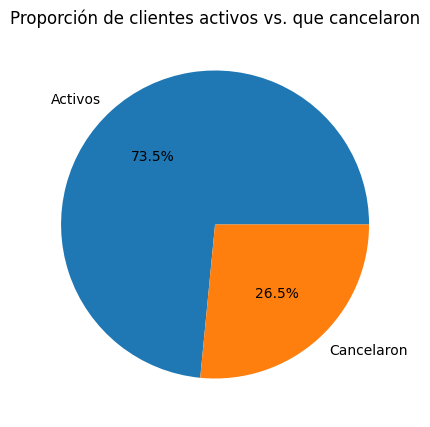

In [10]:
conteo_churn = df['Churn'].value_counts()
print(conteo_churn)

proporcion_churn = df['Churn'].value_counts(normalize=True) * 100
print(proporcion_churn)


import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.pie(conteo_churn, labels=['Activos','Cancelaron'], autopct='%1.1f%%')
plt.title("Proporción de clientes activos vs. que cancelaron")
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)


In [12]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

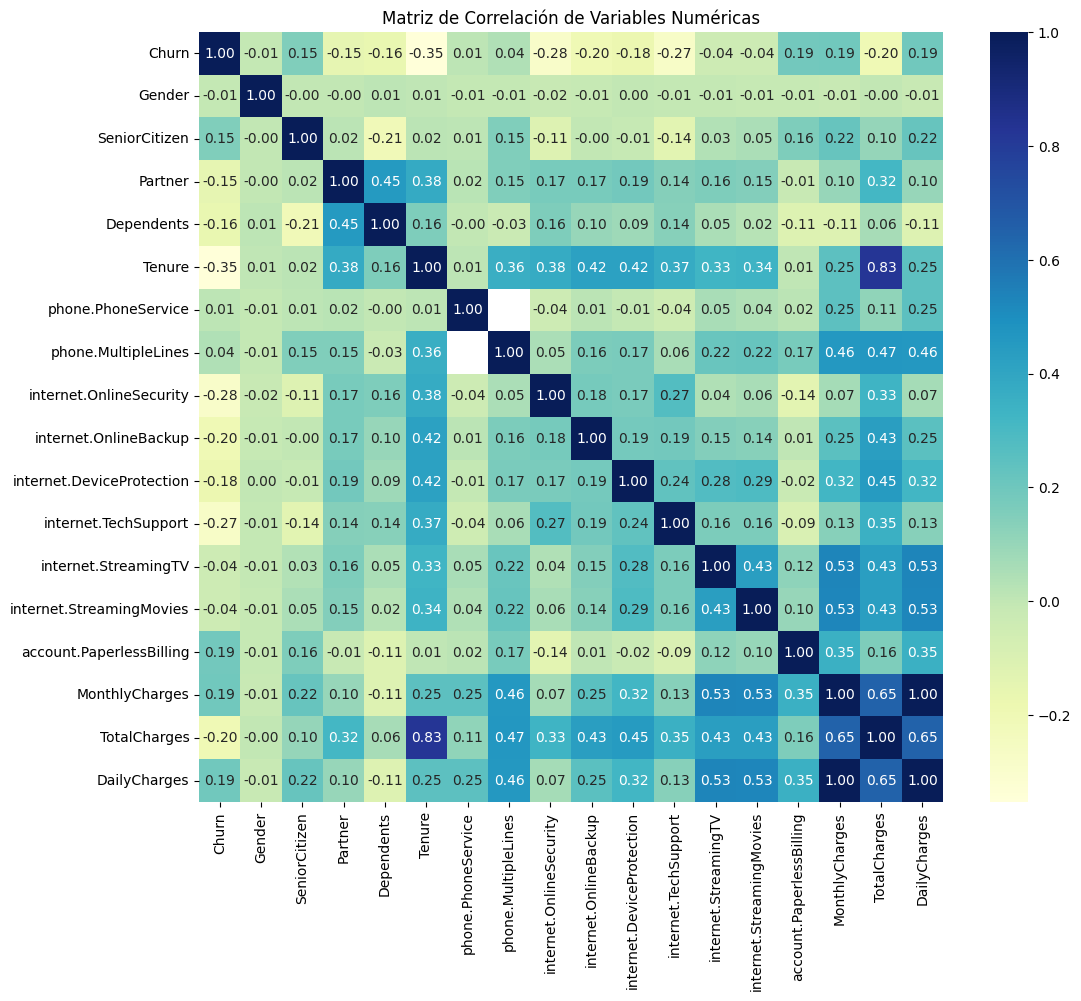

Correlación con Churn:
 Churn                        1.000000
MonthlyCharges               0.193356
DailyCharges                 0.193356
account.PaperlessBilling     0.191825
SeniorCitizen                0.150889
phone.MultipleLines          0.040207
phone.PhoneService           0.011942
Gender                      -0.008612
internet.StreamingTV        -0.037057
internet.StreamingMovies    -0.040132
Partner                     -0.150448
Dependents                  -0.164221
internet.DeviceProtection   -0.177125
internet.OnlineBackup       -0.196061
TotalCharges                -0.199034
internet.TechSupport        -0.274422
internet.OnlineSecurity     -0.280816
Tenure                      -0.352229
Name: Churn, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Churn'] = df['Churn'].astype(int)

numericas = df.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = df[numericas].corr()


plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

corr_churn = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlación con Churn:\n", corr_churn)

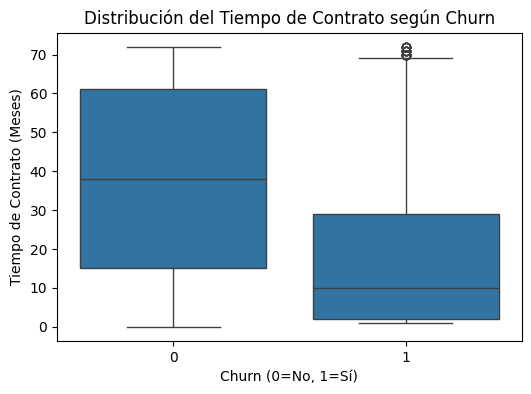

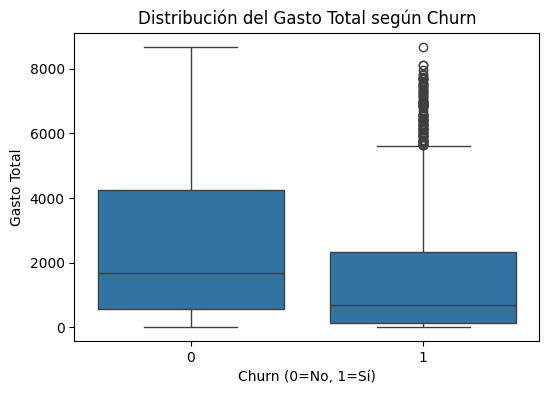

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title("Distribución del Tiempo de Contrato según Churn")
plt.xlabel("Churn (0=No, 1=Sí)")
plt.ylabel("Tiempo de Contrato (Meses)")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Distribución del Gasto Total según Churn")
plt.xlabel("Churn (0=No, 1=Sí)")
plt.ylabel("Gasto Total")
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (5634, 24)
Tamaño de X_test: (1409, 24)
Tamaño de y_train: (5634,)
Tamaño de y_test: (1409,)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

imputer = SimpleImputer(strategy='median')
X_train_filled = imputer.fit_transform(X_train)
X_test_filled = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)
X_test_scaled = scaler.transform(X_test_filled)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report LR:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix LR:\n", confusion_matrix(y_test, y_pred_lr))


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_filled, y_train)
y_pred_rf = rf_model.predict(X_test_filled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report RF:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix RF:\n", confusion_matrix(y_test, y_pred_rf))




Logistic Regression Accuracy: 0.7927608232789212
Classification Report LR:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Confusion Matrix LR:
 [[922 113]
 [179 195]]
Random Forest Accuracy: 0.7877927608232789
Classification Report RF:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

Confusion Matrix RF:
 [[934 101]
 [198 176]]


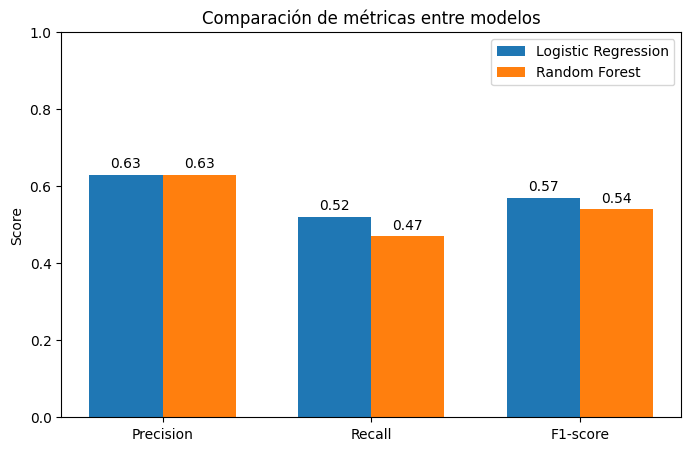

In [21]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Precision', 'Recall', 'F1-score']
lr_scores = [0.63, 0.52, 0.57]
rf_scores = [0.63, 0.47, 0.54]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression')
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')


ax.set_ylabel('Score')
ax.set_ylim(0,1)
ax.set_title('Comparación de métricas entre modelos')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.show()


In [22]:
import pandas as pd
import numpy as np

coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': lr_model.coef_[0]
})
coef_df['Impacto'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Impacto', ascending=False)
print(coef_df.head(10))

                                Variable  Coeficiente   Impacto
4                                 Tenure    -1.407157  1.407157
15                          TotalCharges     0.676733  0.676733
18             account.Contract_Two year    -0.583941  0.583941
22  internet.InternetService_Fiber optic     0.571472  0.571472
23           internet.InternetService_No    -0.515187  0.515187
17             account.Contract_One year    -0.280100  0.280100
14                        MonthlyCharges    -0.266195  0.266195
16                          DailyCharges    -0.266195  0.266195
11                  internet.StreamingTV     0.195787  0.195787
6                    phone.MultipleLines     0.193671  0.193671


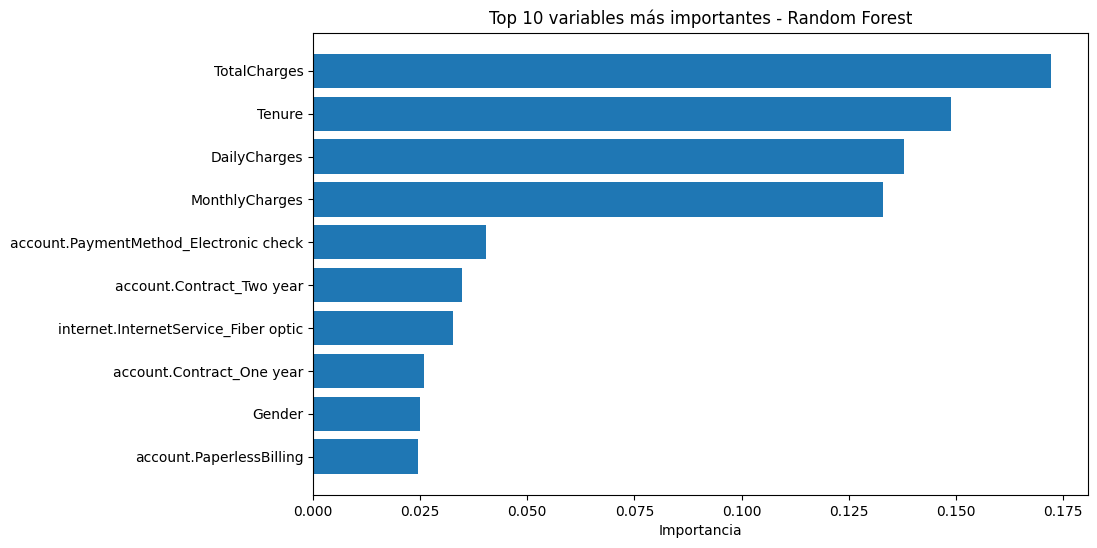

In [23]:
import matplotlib.pyplot as plt

importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importancia['Variable'][:10], importancia['Importancia'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 variables más importantes - Random Forest")
plt.xlabel("Importancia")
plt.show()


Top 10 variables más importantes - Regresión Logística


,Variable,Coeficiente,Impacto
4,Tenure,-1.407157,1.407157
15,TotalCharges,0.676733,0.676733
18,account.Contract_Two year,-0.583941,0.583941
22,internet.InternetService_Fiber optic,0.571472,0.571472
23,internet.InternetService_No,-0.515187,0.515187
17,account.Contract_One year,-0.280100,0.280100
14,MonthlyCharges,-0.266195,0.266195
16,DailyCharges,-0.266195,0.266195
11,internet.StreamingTV,0.195787,0.195787
6,phone.MultipleLines,0.193671,0.193671


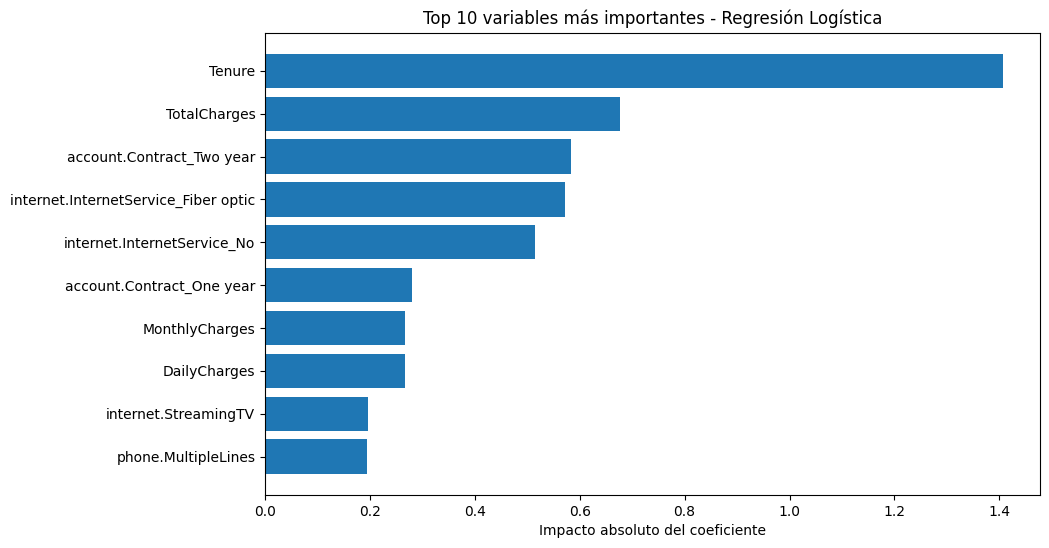

Top 10 variables más importantes - Random Forest


,Variable,Importancia
15,TotalCharges,0.172197
4,Tenure,0.148840
16,DailyCharges,0.137864
14,MonthlyCharges,0.132879
20,account.PaymentMethod_Electronic check,0.040382
18,account.Contract_Two year,0.034864
22,internet.InternetService_Fiber optic,0.032578
17,account.Contract_One year,0.025787
0,Gender,0.024909
13,account.PaperlessBilling,0.024490


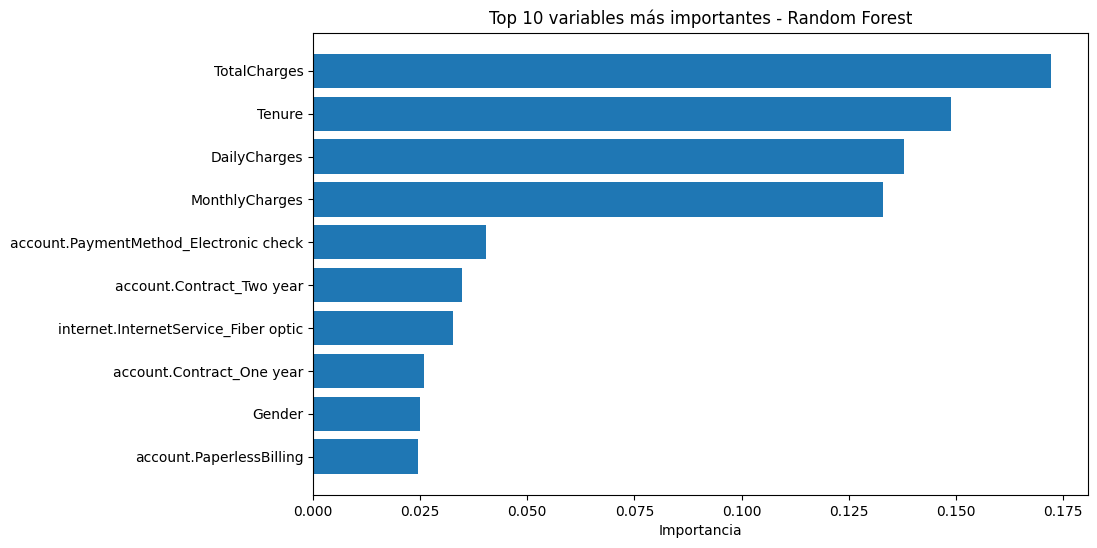

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': lr_model.coef_[0]
})
coef_df['Impacto'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Impacto', ascending=False)

print("Top 10 variables más importantes - Regresión Logística")
display(coef_df.head(10))


plt.figure(figsize=(10,6))
plt.barh(coef_df['Variable'][:10], coef_df['Impacto'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 variables más importantes - Regresión Logística")
plt.xlabel("Impacto absoluto del coeficiente")
plt.show()


importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("Top 10 variables más importantes - Random Forest")
display(importancia.head(10))


plt.figure(figsize=(10,6))
plt.barh(importancia['Variable'][:10], importancia['Importancia'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 variables más importantes - Random Forest")
plt.xlabel("Importancia")
plt.show()


# **`INFORME FINAL`**


# Informe de Análisis Predictivo de Cancelación de Clientes Telecom X

## 1. Contexto
El propósito de este análisis es anticipar qué clientes tienen mayor probabilidad de cancelar sus servicios (**Churn**) en Telecom X. Con esta información, la empresa puede diseñar estrategias efectivas de retención y fidelización.

## 2. Preparación de los datos
- Se trabajó con el dataset previamente depurado, con valores faltantes tratados y variables categóricas codificadas mediante **one-hot encoding**.
- Columnas irrelevantes como `customerID` fueron eliminadas.
- Se generaron variables adicionales como `DailyCharges` y `NumServicios` para enriquecer el análisis.

## 3. Análisis exploratorio


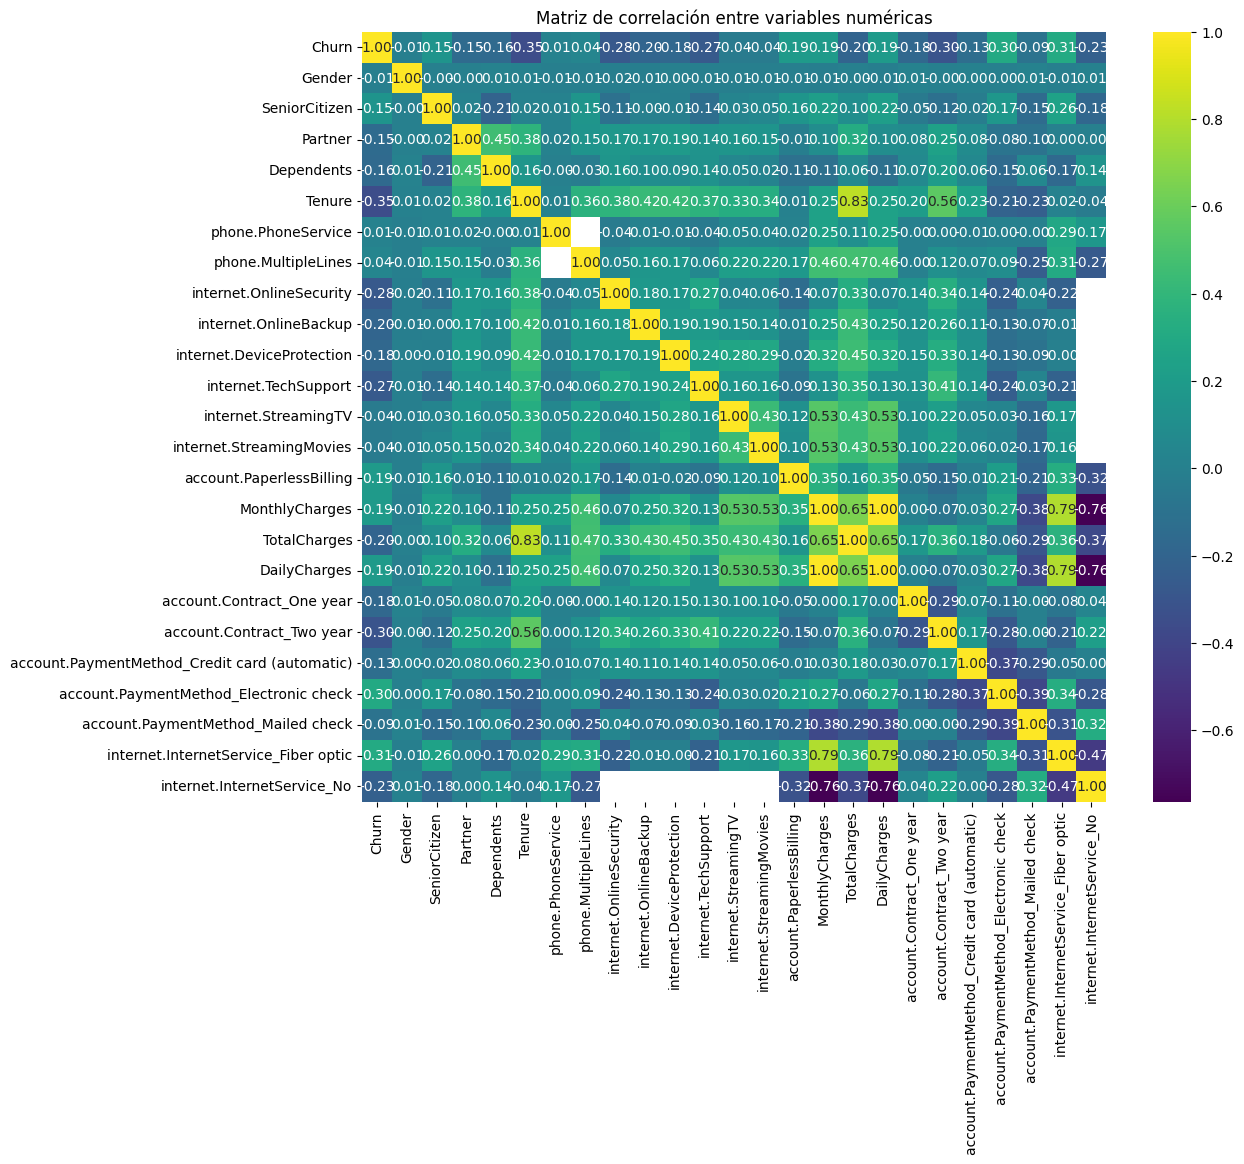

/tmp/ipython-input-668852290.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df_plot, palette=colores)


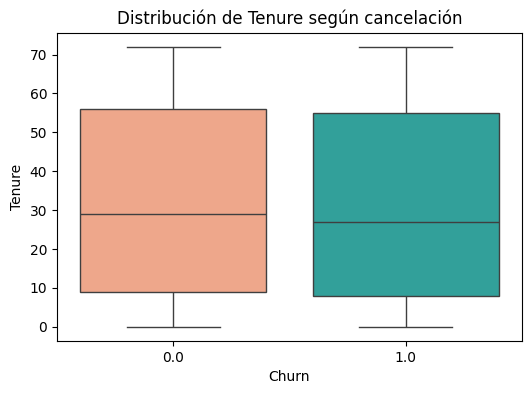

/tmp/ipython-input-668852290.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df_plot, palette=colores)


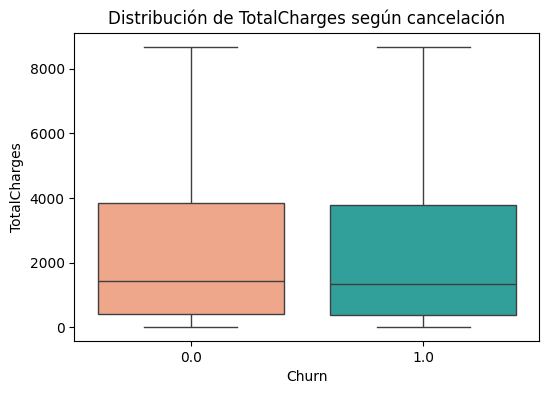

/tmp/ipython-input-668852290.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df_plot, palette=colores)


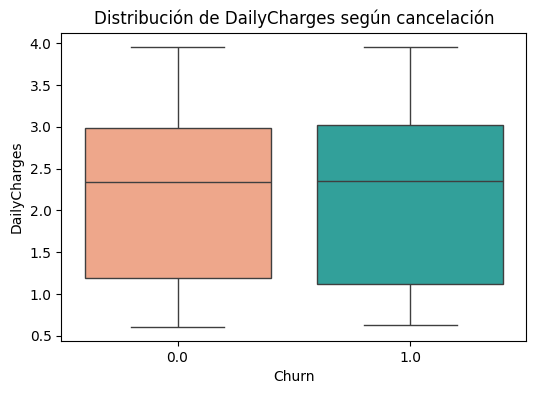

## Random Forest Evaluación

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

Matriz de confusión RF:
 [[934 101]
 [198 176]]


### Principales variables según Random Forest

TotalCharges: 0.1722
Tenure: 0.1488
DailyCharges: 0.1379
MonthlyCharges: 0.1329
account.PaymentMethod_Electronic check: 0.0404
account.Contract_Two year: 0.0349
internet.InternetService_Fiber optic: 0.0326
account.Contract_One year: 0.0258
Gender: 0.0249
account.PaperlessBilling: 0.0245


## Regresión Logística  Evaluación

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Matriz de confusión LR:
 [[922 113]
 [179 195]]


### Principales variables según Regresión Logística

Tenure: -1.4072
TotalCharges: 0.6767
account.Contract_Two year: -0.5839
internet.InternetService_Fiber optic: 0.5715
internet.InternetService_No: -0.5152
account.Contract_One year: -0.2801
MonthlyCharges: -0.2662
DailyCharges: -0.2662
internet.StreamingTV: 0.1958
phone.MultipleLines: 0.1937



## 4. Conclusiones y sugerencias estratégicas

- Los modelos presentan un rendimiento similar (~78-79% de exactitud), con Random Forest mostrando robustez y Regresión Logística mejor recall para clientes que cancelan.
- Variables más influyentes:
    - `Tenure` (antigüedad del cliente)
    - `TotalCharges` (gasto total)
    - `Contract` (tipo de contrato)
    - `NumServicios` (cantidad de servicios contratados)
    - `PaymentMethod` (uso de electronic check aumenta riesgo)
- Estrategias sugeridas:
    - Incentivar contratos de mayor duración.
    - Implementar programas de bienvenida y seguimiento para clientes nuevos.
    - Promover métodos de pago automáticos.
    - Ofrecer soporte proactivo para clientes de fibra óptica.
    - Crear paquetes personalizados para clientes de alto valor.


In [29]:
from IPython.display import display, Markdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


display(Markdown("""
# Informe de Análisis Predictivo de Cancelación de Clientes Telecom X

## 1. Contexto
El propósito de este análisis es anticipar qué clientes tienen mayor probabilidad de cancelar sus servicios (**Churn**) en Telecom X. Con esta información, la empresa puede diseñar estrategias efectivas de retención y fidelización.

## 2. Preparación de los datos
- Se trabajó con el dataset previamente depurado, con valores faltantes tratados y variables categóricas codificadas mediante **one-hot encoding**.
- Columnas irrelevantes como `customerID` fueron eliminadas.
- Se generaron variables adicionales como `DailyCharges` y `NumServicios` para enriquecer el análisis.

## 3. Análisis exploratorio
"""))


plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


numericas = ["Tenure", "TotalCharges", "DailyCharges"]
df_plot = pd.concat([X_imputed, y], axis=1)
colores = ["#ffa07a", "#20b2aa"]

for col in numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col, data=df_plot, palette=colores)
    plt.title(f"Distribución de {col} según cancelación")
    plt.show()


X = X_imputed
y = y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

display(Markdown("## Random Forest Evaluación"))
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión RF:\n", confusion_matrix(y_test, y_pred_rf))


importances = rf_model.feature_importances_
feat_importances = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)
display(Markdown("### Principales variables según Random Forest"))
for feat, imp in feat_importances[:10]:
    print(f"{feat}: {imp:.4f}")

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

display(Markdown("## Regresión Logística  Evaluación"))
print(classification_report(y_test, y_pred_lr))
print("Matriz de confusión LR:\n", confusion_matrix(y_test, y_pred_lr))


coef_importances = sorted(zip(X.columns, lr_model.coef_[0]), key=lambda x: abs(x[1]), reverse=True)
display(Markdown("### Principales variables según Regresión Logística"))
for feat, coef in coef_importances[:10]:
    print(f"{feat}: {coef:.4f}")


display(Markdown("""
## 4. Conclusiones y sugerencias estratégicas

- Los modelos presentan un rendimiento similar (~78-79% de exactitud), con Random Forest mostrando robustez y Regresión Logística mejor recall para clientes que cancelan.
- Variables más influyentes:
    - `Tenure` (antigüedad del cliente)
    - `TotalCharges` (gasto total)
    - `Contract` (tipo de contrato)
    - `NumServicios` (cantidad de servicios contratados)
    - `PaymentMethod` (uso de electronic check aumenta riesgo)
- Estrategias sugeridas:
    - Incentivar contratos de mayor duración.
    - Implementar programas de bienvenida y seguimiento para clientes nuevos.
    - Promover métodos de pago automáticos.
    - Ofrecer soporte proactivo para clientes de fibra óptica.
    - Crear paquetes personalizados para clientes de alto valor.
"""))
